In [95]:
import numpy as np
from matplotlib import pyplot as plt
import math as math

In [2]:
my_data = np.genfromtxt('mcpd_augmented.csv', delimiter=',')

##### Index a column in numpy display(my_data[:,1])

In [2]:
## Needs to set up the standard Deviation and the Standard mean in row form...

mean_data = np.mean(my_data,axis=0)
std_data = np.std(my_data,axis=0)
std_data[std_data==0]=1

NameError: name 'my_data' is not defined

Z-Score = (value-mean)/std

In [42]:
z_scored_data = (my_data - mean_data) / std_data

## Activation Layers

In [35]:
def Linear(Layer):
    linear_data = Layer
    return linear_data
def ReLu(Layer):
    relu_data = np.maximum(0,Layer)
    return relu_data
def Sigmoid(Layer):
    sig_data = 1/(1+np.exp(-Layer))
    return sig_data
def Softmax(Layer):
    top, bottom = np.exp(Layer-(np.amax(Layer, axis=0))), np.sum(np.exp(Layer-(np.amax(Layer, axis=0))))
    soft_data = top/bottom
    return soft_data

# Either Tanh will work
def Tanh(Layer):
    pos = np.exp(Layer)
    neg = np.exp(-Layer)
    tanh_data = (pos-neg)/(pos+neg)
    return tanh_data
def Tanh2(Layer):
    tanh_data = (np.exp(Layer) - np.exp(-Layer)) / (np.exp(Layer)+np.exp(-Layer))
    return tanh_data


In [36]:
linear_data = Linear(z_scored_data)
relu_data = ReLu(z_scored_data)
sig_data = Sigmoid(z_scored_data)
soft_data = Softmax(z_scored_data)
tanh1_data = Tanh(z_scored_data)
tanh2_data = Tanh2(z_scored_data)


## Fully Connected Layer

Takes in the number of Features coming in and coming out. Weights should be random values in between -+10^-4
The two attributes are the weight matrx and the the bias vector

In [43]:
n,m = z_scored_data.shape

In [59]:
x = np.array([[1,2,3,4],[5,6,7,8]])

In [46]:
test = np.random.uniform(-0.0001, 0.0001,size=(6,2))
weight = np.matmul(z_scored_data,test)
bias = np.random.uniform(-0.0001, 0.0001,size=(1,2))

In [49]:
h  = np.array([[-1,2,3,4]])

In [7]:
empt_array = np.zeros((np.size(h),np.size(h)))

In [12]:
x = np.fill_diagonal(empt_array,np.ones(np.size(h)))
display(empt_array)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

array([[0, 2, 3, 4]])

In [50]:
h[h>=0]=1
display(h)
h[h<0]=0
display(h)

array([[-1,  1,  1,  1]])

array([[0, 1, 1, 1]])

In [22]:
empt_array = np.zeros((np.size(h),np.size(h)))
np.fill_diagonal(empt_array,h)
display(empt_array)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

Sigmoid

In [52]:
h  = np.array([[1,2,3,4]])
h_forward = np.array([[0.73105858, 0.88079708, 0.95257413, 0.98201379]])

In [54]:
h_diag = h_forward*(1-h_forward) # this works
in_size = np.size(h_diag)

In [55]:
empt_array = np.zeros((in_size,in_size))
np.fill_diagonal(empt_array,h_diag)
display(empt_array)

array([[0.19661193, 0.        , 0.        , 0.        ],
       [0.        , 0.10499358, 0.        , 0.        ],
       [0.        , 0.        , 0.04517666, 0.        ],
       [0.        , 0.        , 0.        , 0.01766271]])

Tanh

In [56]:
h_forward = np.array([[0.76159416, 0.96402758, 0.99505475, 0.9993293 ]])

In [57]:
display(1-h_forward**2)

array([[0.41997434, 0.07065082, 0.00986604, 0.00134095]])

Softmax

In [65]:
h_for = np.array([[0.0320586,  0.08714432, 0.23688282, 0.64391426]])

In [68]:
print(h_for[:,1])

[0.08714432]


In [71]:
len(h_for[0])

4

In [72]:
for i in range(0,len(h_for[0])): # this works for location
    print(h_for[:,i])

[0.0320586]
[0.08714432]
[0.23688282]
[0.64391426]


In [74]:
empt_array = np.zeros((in_size,in_size)) #empty 4x4 matrix
np.fill_diagonal(empt_array,h_diag)
display(empt_array)

array([[0.19661193, 0.        , 0.        , 0.        ],
       [0.        , 0.10499358, 0.        , 0.        ],
       [0.        , 0.        , 0.04517666, 0.        ],
       [0.        , 0.        , 0.        , 0.01766271]])

In [76]:
for col in range(0,len(empt_array[0])):
    for row in range(0,len(empt_array)):
        print(empt_array[row,col],col)

0.19661193260838358 0
0.0 0
0.0 0
0.0 0
0.0 1
0.10499358386347359 1
0.0 1
0.0 1
0.0 2
0.0 2
0.045176656854743084 2
0.0 2
0.0 3
0.0 3
0.0 3
0.017662706249835902 3


In [84]:
ar_index = 0
while ar_index < len(h_for[0]):
    for mat_index in range(0,len(empt_array)):
        if mat_index == ar_index:
            empt_array[mat_index,ar_index] = h_for[:,ar_index]*(1-h_for[:,ar_index])
        else:
            empt_array[mat_index,ar_index] = -h_for[:,ar_index] * h_for[:,mat_index]
    ar_index+=1


In [85]:
empt_array

array([[ 0.03103085, -0.00279372, -0.00759413, -0.02064299],
       [-0.00279372,  0.07955019, -0.02064299, -0.05611347],
       [-0.00759413, -0.02064299,  0.18076935, -0.15253223],
       [-0.02064299, -0.05611347, -0.15253223,  0.22928869]])

In [86]:
np.transpose(empt_array)

array([[ 0.03103085, -0.00279372, -0.00759413, -0.02064299],
       [-0.00279372,  0.07955019, -0.02064299, -0.05611347],
       [-0.00759413, -0.02064299,  0.18076935, -0.15253223],
       [-0.02064299, -0.05611347, -0.15253223,  0.22928869]])

In [5]:
J = lambda ww1,ww2,xx1,xx2: (xx1*ww1 - 5*xx2*ww2 - 2)**2
DJDW1 = lambda ww1,ww2,xx1,xx2: 2 * xx1 * (xx1*ww1 - 5*xx2*ww2 - 2)
DJDW2 = lambda ww1,ww2,xx1,xx2: -10 * xx2 * (xx1*ww1 - 5*xx2*ww2 - 2)

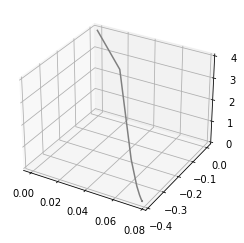

In [6]:
learning_rate = 0.01
epochs = 100
w1,w2 = 0,0
x1,x2 = 1,1
j = [J(w1,w2,x1,x2)]
grad_w1, grad_w2 = [DJDW1(w1,w2,x1,x2)],[DJDW2(w1,w2,x1,x2)]
# cal j
# cal gradient
# loop

store_w1,store_w2 = [w1],[w2]
i = 0
while i <= epochs:
    trash_j = J(w1,w2,x1,x2)
    trash_grad_w1,trash_grad_w2 = DJDW1(w1,w2,x1,x2),DJDW2(w1,w2,x1,x2)
    w1 = w1 - learning_rate * trash_grad_w1
    w2 = w2 - learning_rate * trash_grad_w2

    j.append(trash_j)
    store_w1.append(w1)
    store_w2.append(w2)

    i+=1



    
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(store_w1, store_w2, j, 'gray')

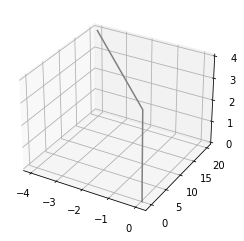

In [7]:
learning_rate = 0.01
epochs = 100
w1,w2 = 0,0
x1,x2 = 1,1
j = [(x1*w1 - 5*x2*w2 - 2)**2]
store_w1,store_w2 = [2 * x1 * (x1*w1 - 5*x2*w2 - 2)],[-10 * x2 * (x1*w1 - 5*x2*w2 - 2)]

index = 0
while index <= epochs:
    trash_j = (x1*w1 - 5*x2*w2 - 2)**2
    trash_grad_w1 = 2 * x1 * (x1*w1 - 5*x2*w2 - 2)
    trash_grad_w2 = -10 * x2 * (x1*w1 - 5*x2*w2 - 2)

    w1 = w1 - learning_rate * trash_grad_w1
    w2 = w2 - learning_rate * trash_grad_w2

    j.append(trash_j)
    store_w1.append(w1)
    store_w2.append(w2)

    index+=1

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(store_w1, store_w2, j, 'gray')

In [8]:
import matplotlib.pyplot as plt
import numpy as np


class Assignment3Part2:
    def __init__(self):
        self.x = np.array([[1],
                           [1]])
        self.w = np.array([[0],
                           [0]])
        self.eta = 0.01
        self.epochs = 100

    def J(self, w1, w2):
        x1 = self.x[0][0]
        x2 = self.x[1][0]
        return (x1 * w1 - 5 * x2 * w2 - 2) ** 2

    def dJdw1(self, w1, w2):
        x1 = self.x[0][0]
        x2 = self.x[1][0]
        return 2 * x1 * (x1 * w1 - 5 * x2 * w2 - 2)

    def dJdw2(self, w1, w2):
        x1 = self.x[0][0]
        x2 = self.x[1][0]
        return -10 * x2 * (x1 * w1 - 5 * x2 * w2 - 2)

    def gradient_descent(self, w1, w2, J):
        aw1 = [w1]
        aw2 = [w2]
        aJ = [J]

        ep = 0
        while ep <= self.epochs:
            J = self.J(w1, w2)
            dJdw1 = self.dJdw1(w1, w2)
            dJdw2 = self.dJdw2(w2, w2)
            w1 = w1 - self.eta * dJdw1
            w2 = w2 - self.eta * dJdw2

            aw1.append(w1)
            aw2.append(w2)
            aJ.append(J)
            ep += 1

        return aw1, aw2, aJ

    def plot_3d_line(self):
        w1 = self.w[0][0]
        w2 = self.w[1][0]
        J = self.J(w1, w2)

        aw1, aw2, aJ = self.gradient_descent(w1, w2, J)
        print(aw1)
        print(aw2)
        print(aJ)

        ax = plt.axes(projection='3d')
        ax.plot3D(aw1, aw2, aJ, 'red')
        ax.set_title('Gradient Descent for x=[1 1]')
        ax.set_xlabel('w1')
        ax.set_ylabel('w2')
        ax.set_zlabel('J')
        plt.show()

    def run_all(self):
        print("====================PART 2====================")
        print("SANITY CHECK: RESULTS FROM THEORY SECTION")
        w1 = self.w[0][0]
        w2 = self.w[1][0]
        print("J: " + str(self.J(w1, w2)))
        print("dJdw1: " + str(self.dJdw1(w1, w2)))
        print("dJdw2: " + str(self.dJdw2(w1, w2)))
        self.plot_3d_line()

====================PART 2====================
SANITY CHECK: RESULTS FROM THEORY SECTION
J: 4
dJdw1: -4
dJdw2: 20
[0, 0.04, 0.0592, 0.066016, 0.06549568000000001, 0.06066576640000001, 0.05334045107200001, 0.044606442050560004, 0.0351139932095488, 0.02525152134535782, 0.015250375718450658, 0.005247699084081648, -0.004675856369599982, -0.014473500125407988, -0.024118726652819833, -0.03359717003771544, -0.042901717387732324, -0.05202957749044039, -0.060980522610909214, -0.06975583416085761, -0.07835767067894041, -0.08678868918614156, -0.09505181855488672, -0.10315012407526976, -0.11108672672865283, -0.11886475527501285, -0.12648731801807245, -0.1339574863668469, -0.14127828546499152, -0.14845268905098064, -0.15548361684713438, -0.1623739334564957, -0.16912644815514818, -0.17574391521271468, -0.18222903452086206, -0.18858445239788582, -0.1948127624903927, -0.2009165067248636, -0.2068981762809336, -0.21276021256965527, -0.21850500820686639, -0.22413490797589158, -0.22965220977627127, -0.235

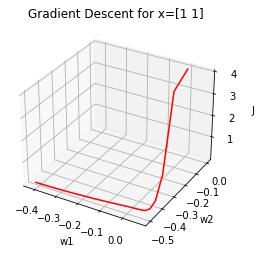

In [10]:
a = Assignment3Part2()
a.run_all()

Tensors

We are currently making a matrix.... next we need to create a tensor........
We currently output 1 matrix... the tensor is multiple matrixies being returned.

In [6]:
dataIn = np.genfromtxt('KidCreative.csv', delimiter=',')

In [18]:
totRows = np.size(dataIn, axis=0) # Grab the total number of rows
tensor = np.random.rand(0,totRows,totRows) # Create an empty tensor

for row in range(totRows):
    storage = np.zeros((totRows,totRows))
    tensor = np.concatenate((tensor,storage[None]),axis=0)

In [19]:
tensor.shape

(674, 674, 674)

In [20]:
display(tensor)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [27]:
def tensorConcat(tensor,storage):
    return np.concatenate((tensor,storage[None]),axis=0)

In [48]:
totRows = np.size(dataIn, axis=0) # Grab the total number of rows
totColumns = np.size(dataIn, axis=1)
tensor = np.random.rand(0,totColumns,totColumns) # Create an empty tensor

dataIn[dataIn>=0]=1
dataIn[dataIn<0]=0

for row in range(totRows):
    grad_relu_data = np.zeros((totColumns,totColumns))
    np.fill_diagonal(grad_relu_data,dataIn[row])
    tensor = tensorConcat(tensor,grad_relu_data)

print(tensor.shape)
display(tensor)

(2, 4, 4)


array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]],

       [[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]])

In [48]:
totRows = np.size(dataIn, axis=0) # Grab the total number of rows
totColumns = np.size(dataIn, axis=1) # Grab the total number of columns
tensor = np.random.rand(0,totColumns,totColumns) # Create an empty tensor

for row in range(totRows):
    diagonal = dataIn[row]*(1-dataIn[row]) # diagonal calculation
    gradData = np.zeros((totColumns,totColumns))
    np.fill_diagonal(gradData,diagonal)
    tensor = np.concatenate((tensor,gradData[None]),axis=0)

print(tensor.shape)
display(tensor)

(2, 4, 4)


array([[[  0.,   0.,   0.,   0.],
        [  0.,  -2.,   0.,   0.],
        [  0.,   0.,  -6.,   0.],
        [  0.,   0.,   0., -12.]],

       [[-20.,   0.,   0.,   0.],
        [  0., -30.,   0.,   0.],
        [  0.,   0., -42.,   0.],
        [  0.,   0.,   0., -56.]]])

In [22]:
totColumns = np.size(dataIn, axis=1)
print(len(dataIn[1]))
print(totColumns)

4
4


In [14]:
#dataIn = self.getPrevOut()
totRows = np.size(dataIn, axis=0) # Grab the total number of rows
totColumns = np.size(dataIn, axis=1) # Grab the total number of columns
tensor = np.random.rand(0,totColumns,totColumns) # Create an empty tensor

inSize = np.size(dataIn)
grad_soft_data = np.zeros((inSize,inSize))
ar_index = 0
while ar_index < len(dataIn[0]):
    for mat_index in range(0,len(grad_soft_data)):
        if mat_index == ar_index:
            grad_soft_data[mat_index,ar_index] = dataIn[:,ar_index]*(1-dataIn[:,ar_index])
        else:
            grad_soft_data[mat_index,ar_index] = -dataIn[:,ar_index] * dataIn[:,mat_index]
    ar_index+=1

display(grad_soft_data)

array([[  0.,  -2.,  -3.,  -4.],
       [ -2.,  -2.,  -6.,  -8.],
       [ -3.,  -6.,  -6., -12.],
       [ -4.,  -8., -12., -12.]])

In [57]:
totRows = np.size(dataIn, axis=0) # Grab the total number of rows
totColumns = np.size(dataIn, axis=1) # Grab the total number of columns
tensor = np.random.rand(0,totColumns,totColumns) # Create an empty tensor

for row in range(totRows):
    gradData = np.zeros((totColumns,totColumns))
    aIndex = 0
    while aIndex < totColumns:
        for bIndex in range(0,len(gradData)):
            if bIndex == aIndex:
                gradData[bIndex,aIndex] = dataIn[row,aIndex]*(1-dataIn[row,aIndex])
            else:
                gradData[bIndex,aIndex] = -dataIn[row,aIndex] * dataIn[row,bIndex]
        aIndex+=1

    tensor = np.concatenate((tensor,gradData[None]),axis=0)

display(tensor)

array([[[  0.,  -2.,  -3.,  -4.],
        [ -2.,  -2.,  -6.,  -8.],
        [ -3.,  -6.,  -6., -12.],
        [ -4.,  -8., -12., -12.]],

       [[-20., -30., -35., -40.],
        [-30., -30., -42., -48.],
        [-35., -42., -42., -56.],
        [-40., -48., -56., -56.]]])

In [47]:
tensor.shape

(2, 4, 4)

In [54]:
dataIn = np.array([[1,2,3,4],[5,6,7,8]])

In [56]:
totRows = np.size(dataIn, axis=0) # Grab the total number of rows
totColumns = np.size(dataIn, axis=1) # Grab the total number of columns
tensor1 = np.random.rand(0,totColumns,totColumns) # Create an empty tensor

for row in range(totRows):
    diagonal = 1-dataIn[row]**2 # diagonal calculation
    gradData = np.zeros((totColumns,totColumns))
    np.fill_diagonal(gradData,diagonal)
    tensor1 = np.concatenate((tensor,gradData[None]),axis=0)

a:b

In [52]:
inSize = np.size(dataIn)
h_diag = 1-dataIn**2
grad_tanh_data = np.zeros((inSize,inSize))
np.fill_diagonal(grad_tanh_data,h_diag)
print(grad_tanh_data)

[[  0.   0.   0.   0.]
 [  0.  -3.   0.   0.]
 [  0.   0.  -8.   0.]
 [  0.   0.   0. -15.]]


In [61]:
np.tensordot(tensor,tensor1,).shape

ValueError: shape-mismatch for sum

In [62]:
    X = np.array([[1, 2, 3, 4],
                  [5, 6, 7, -1],
                  [1, 2, 3, 5]])

In [66]:
len(X[1])

4

In [82]:
data = np.genfromtxt('mcpd_augmented.csv', delimiter=',', skip_header= True)

In [73]:
np.random.seed(0) # for now... remember to take out
np.random.shuffle(data) # shuffle data
totRows = np.size(data, axis=0)
X,Y = data[:round(totRows*(2/3)),:], data[round(totRows*(2/3)):,:]

In [74]:
def split(data,percent):
    np.random.seed(0) # for now... remember to take out
    np.random.shuffle(data) # shuffle data
    totRows = np.size(data, axis=0)
    X,Y = data[:round(totRows*percent),:], data[round(totRows*percent):,:]
    return X,Y

1339
893
446


In [83]:
display(data[:,:-1])

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  4.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  0.  ,  3.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  0.  ,  3.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  0.  ,  3.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  4.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  2.  ]])

In [84]:
display(data[:,-1:])

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [85]:
list = [1,2,3,4]
display(list[-1])

4

In [91]:
layers = [1,2,3,4]
for backwardLayer in range(len(layers)-2,0,-1):
    print(backwardLayer)

2
1


In [93]:
layers[1]

2

In [106]:
data = np.genfromtxt('KidCreative.csv', delimiter=',', skip_header= True)

In [111]:
train_data = data[:, :-1]
print(train_data)

[[1.00e+00 0.00e+00 2.40e+04 ... 0.00e+00 0.00e+00 0.00e+00]
 [2.00e+00 1.00e+00 7.50e+04 ... 1.00e+00 1.00e+00 1.00e+00]
 [3.00e+00 0.00e+00 4.60e+04 ... 1.00e+00 1.00e+00 0.00e+00]
 ...
 [6.71e+02 1.00e+00 7.50e+04 ... 1.00e+00 1.00e+00 0.00e+00]
 [6.72e+02 1.00e+00 5.10e+04 ... 1.00e+00 1.00e+00 0.00e+00]
 [6.73e+02 0.00e+00 1.10e+04 ... 0.00e+00 1.00e+00 0.00e+00]]


In [117]:
print(1 * (10 ** -10))
print(1e-10)
print(10**-10)

1e-10
1e-10
1e-10
